In [1]:
pip install opendatasets

Note: you may need to restart the kernel to use updated packages.


In [2]:
import os
import zipfile
from tqdm import tqdm
from PIL import Image
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2


In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

current_directory = os.getcwd()
print("Current working directory:", current_directory)

Current working directory: /home/p/pakrit/MRI


In [4]:
import opendatasets as od

# Define the dataset URL
dataset_url = "https://www.kaggle.com/datasets/masoudnickparvar/brain-tumor-mri-dataset"

# Define the download path relative to the current directory
download_path = "/home/p/pakrit/DeepNN/MRI/Gender_Classification"

# Download the dataset to the specified path
od.download(dataset_url, download_path=download_path)


Dataset URL: https://www.kaggle.com/datasets/masoudnickparvar/brain-tumor-mri-dataset


100%|██████████| 149M/149M [00:05<00:00, 26.7MB/s] 


In [5]:
def count_files_in_directory(directory):
    file_count = 0
    if os.path.exists(directory):
        for root, dirs, files in os.walk(directory):
            print(f"Folder: {root}, Files: {len(files)}")
            file_count += len(files)
    else:
        print(f"Directory '{directory}' does not exist.")
    return file_count

# Specify the directory you want to explore
destination_dir = '/home/p/pakrit/MRI/brain-tumor-mri-dataset'
root_directory = destination_dir  # Change this to your desired directory

total_files = count_files_in_directory(root_directory)
print(f"Total files in '{root_directory}': {total_files}")

Folder: /home/p/pakrit/MRI/brain-tumor-mri-dataset, Files: 0
Folder: /home/p/pakrit/MRI/brain-tumor-mri-dataset/Testing, Files: 0
Folder: /home/p/pakrit/MRI/brain-tumor-mri-dataset/Testing/glioma, Files: 300
Folder: /home/p/pakrit/MRI/brain-tumor-mri-dataset/Testing/meningioma, Files: 306
Folder: /home/p/pakrit/MRI/brain-tumor-mri-dataset/Testing/notumor, Files: 405
Folder: /home/p/pakrit/MRI/brain-tumor-mri-dataset/Testing/pituitary, Files: 300
Folder: /home/p/pakrit/MRI/brain-tumor-mri-dataset/Training, Files: 0
Folder: /home/p/pakrit/MRI/brain-tumor-mri-dataset/Training/glioma, Files: 1321
Folder: /home/p/pakrit/MRI/brain-tumor-mri-dataset/Training/meningioma, Files: 1339
Folder: /home/p/pakrit/MRI/brain-tumor-mri-dataset/Training/notumor, Files: 1595
Folder: /home/p/pakrit/MRI/brain-tumor-mri-dataset/Training/pituitary, Files: 1457
Total files in '/home/p/pakrit/MRI/brain-tumor-mri-dataset': 7023


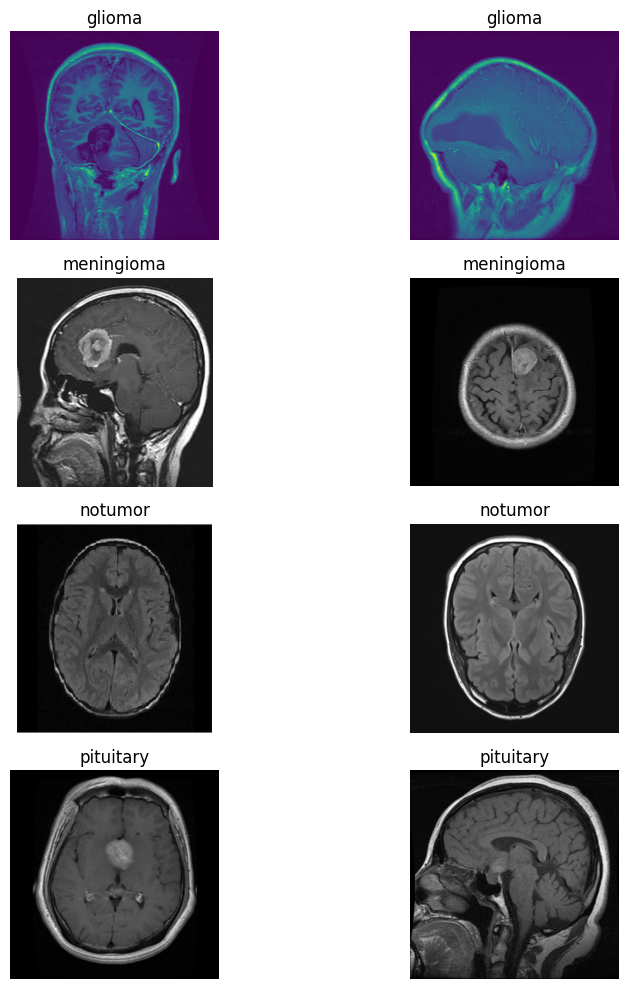

In [6]:
import os
import random
import matplotlib.pyplot as plt
from PIL import Image

# Path to the main folder containing subfolders
main_folder = "/home/p/pakrit/MRI/brain-tumor-mri-dataset/Training"

# Get a list of all subfolders
subfolders = [f.path for f in os.scandir(main_folder) if f.is_dir()]

# Define a function to get random images with labels
def get_random_images_with_labels(num_images):
    images_with_labels = []
    for folder in subfolders:
        images = [os.path.join(folder, f) for f in os.listdir(folder) if os.path.isfile(os.path.join(folder, f))]
        random_images = random.sample(images, min(num_images, len(images)))
        for img_path in random_images:
            label = os.path.basename(folder)
            images_with_labels.append((img_path, label))
    return images_with_labels

# Display random 25 images in a grid with labels
random_images = get_random_images_with_labels(2)
num_cols = 2  # Number of columns in the grid
num_rows = (len(random_images) + num_cols - 1) // num_cols  # Calculate number of rows needed
fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 10))

for i, (img_path, label) in enumerate(random_images):
    img = Image.open(img_path)
    ax = axes[i // num_cols, i % num_cols]  # Calculate position of current image
    ax.imshow(img)
    ax.set_title(label)
    ax.axis('off')

# Hide empty subplots if number of images is less than the size of the grid
for j in range(len(random_images), num_rows * num_cols):
    axes[j // num_cols, j % num_cols].axis('off')

plt.tight_layout()
plt.show()


In [7]:
import os
from PIL import Image

def get_image_size(file_path):
    with Image.open(file_path) as img:
        return img.size

def mean_dimensions_of_images(directory):
    total_width = 0
    total_height = 0
    num_images = 0

    if os.path.exists(directory):
        for root, _, files in os.walk(directory):
            for file in files:
                file_path = os.path.join(root, file)
                if file_path.endswith(('.jpg', '.jpeg', '.png', '.gif')):  # Add more image extensions if needed
                    width, height = get_image_size(file_path)
                    total_width += width
                    total_height += height
                    num_images += 1

        if num_images > 0:
            mean_width = total_width / num_images
            mean_height = total_height / num_images
            return mean_width, mean_height
        else:
            return None  # No image files found in the directory
    else:
        print(f"Directory '{directory}' does not exist.")
        return None

# Specify the directory you want to explore
destination_dir = '/home/p/pakrit/MRI/brain-tumor-mri-dataset/Training'
root_directory = destination_dir  # Change this to your desired directory

mean_width, mean_height = mean_dimensions_of_images(root_directory)
if mean_width is not None and mean_height is not None:
    print(f"Mean width of images in '{root_directory}': {mean_width}")
    print(f"Mean height of images in '{root_directory}': {mean_height}")
else:
    print("No image files found in the directory.")


Mean width of images in '/home/p/pakrit/MRI/brain-tumor-mri-dataset/Training': 451.563200280112
Mean height of images in '/home/p/pakrit/MRI/brain-tumor-mri-dataset/Training': 453.8837535014006
